In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Recreate RNA-seq dataframe
data = {
    "gene_id": [
        "ENSG00000141510",
        "ENSG00000136997",
        "ENSG00000146648",
        "ENSG00000012048",
        "ENSG00000171791"
    ],
    "gene_symbol": [
        "TP53",
        "MYC",
        "EGFR",
        "BRCA1",
        "BCL2"
    ],
    "control_1": [540, 1450, 430, 200, 41],
    "control_2": [530, 1400, 420, 210, 39],
    "treated_1": [780, 2100, 610, 190, 60],
    "treated_2": [770, 2150, 630, 220, 62]
}

df = pd.DataFrame(data)

sample_cols = ["control_1", "control_2", "treated_1", "treated_2"]

df

,gene_id,gene_symbol,control_1,control_2,treated_1,treated_2
0,ENSG00000141510,TP53,540,530,780,770
1,ENSG00000136997,MYC,1450,1400,2100,2150
2,ENSG00000146648,EGFR,430,420,610,630
3,ENSG00000012048,BRCA1,200,210,190,220
4,ENSG00000171791,BCL2,41,39,60,62


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
counts = pd.DataFrame({
    "gene_id": ["ENSG00000141510", "ENSG00000012048", "ENSG00000136997", "ENSG00000146648", "ENSG00000171862"],
    "gene_symbol": ["TP53", "BRCA1", "MYC", "EGFR", "BCL2"],
    "control_1": [523, 120, 1500, 430, 88],
    "control_2": [510, 130, 1420, 390, 95],
    "treated_1": [800, 300, 2100, 600, 140],
    "treated_2": [790, 280, 2200, 620, 150]
})

counts

,gene_id,gene_symbol,control_1,control_2,treated_1,treated_2
0,ENSG00000141510,TP53,523,510,800,790
1,ENSG00000012048,BRCA1,120,130,300,280
2,ENSG00000136997,MYC,1500,1420,2100,2200
3,ENSG00000146648,EGFR,430,390,600,620
4,ENSG00000171862,BCL2,88,95,140,150


In [52]:
counts.head()
counts.shape
counts.dtypes

gene_id          str
gene_symbol      str
control_1      int64
control_2      int64
treated_1      int64
treated_2      int64
dtype: object

In [53]:
sample_cols = ["control_1","control_2","treated_1","treated_2"]

library_size = counts[sample_cols].sum(axis=0)
library_size

control_1    2661
control_2    2545
treated_1    3940
treated_2    4040
dtype: int64

In [54]:
counts["total_counts"] = counts[sample_cols].sum(axis=1)
counts[["gene_symbol", "total_counts"]]

,gene_symbol,total_counts
0,TP53,2623
1,BRCA1,830
2,MYC,7220
3,EGFR,2040
4,BCL2,473


In [55]:
filtered = counts[counts["total_counts"] > 1000].copy()
filtered[["gene_symbol", "total_counts"]]

,gene_symbol,total_counts
0,TP53,2623
2,MYC,7220
3,EGFR,2040


In [56]:
log_counts = filtered.copy()

for c in sample_cols:
    log_counts[c] = np.log2(log_counts[c] + 1)

log_counts

,gene_id,gene_symbol,control_1,control_2,treated_1,treated_2,total_counts
0,ENSG00000141510,TP53,9.033423,8.997179,9.645658,9.627534,2623
2,ENSG00000136997,MYC,10.551708,10.472691,11.036860,11.103943,7220
3,ENSG00000146648,EGFR,8.751544,8.611025,9.231221,9.278449,2040


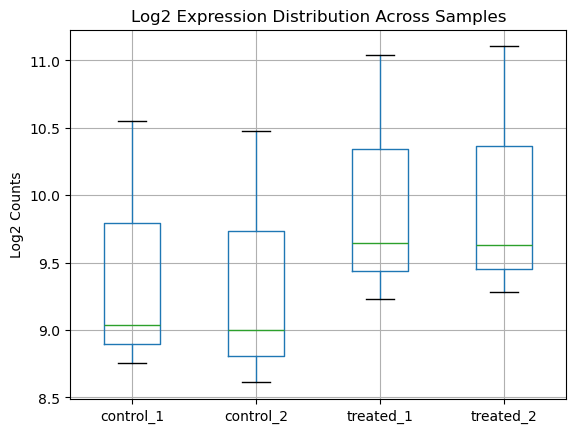

In [57]:
plt.figure()
log_counts[sample_cols].boxplot()
plt.title("Log2 Expression Distribution Across Samples")
plt.ylabel("Log2 Counts")
plt.show()

In [58]:
log_counts[sample_cols].median()

control_1    9.033423
control_2    8.997179
treated_1    9.645658
treated_2    9.627534
dtype: float64

In [59]:
library_sizes = df[sample_cols].sum()
library_sizes

control_1    2661
control_2    2599
treated_1    3740
treated_2    3832
dtype: int64

In [60]:
cpm = df.copy()

for col in sample_cols:
    cpm[col] = (df[col] / library_sizes[col]) * 1_000_000

cpm

,gene_id,gene_symbol,control_1,control_2,treated_1,treated_2
0,ENSG00000141510,TP53,202931.228861,203924.586379,208556.149733,200939.457203
1,ENSG00000136997,MYC,544907.929350,538668.718738,561497.326203,561064.718163
2,ENSG00000146648,EGFR,161593.385945,161600.615621,163101.604278,164405.010438
3,ENSG00000012048,BRCA1,75159.714393,80800.307811,50802.139037,57411.273486
4,ENSG00000171791,BCL2,15407.741451,15005.771451,16042.780749,16179.540710


In [61]:
log_cpm = cpm.copy()

for col in sample_cols:
    log_cpm[col] = np.log2(log_cpm[col] + 1)

log_cpm

,gene_id,gene_symbol,control_1,control_2,treated_1,treated_2
0,ENSG00000141510,TP53,17.630638,17.637683,17.670083,17.616409
1,ENSG00000136997,MYC,19.055656,19.039041,19.098922,19.097810
2,ENSG00000146648,EGFR,17.302018,17.302082,17.315420,17.326904
3,ENSG00000012048,BRCA1,16.197691,16.302091,15.632630,15.809072
4,ENSG00000171791,BCL2,13.911461,13.873326,13.969727,13.981972


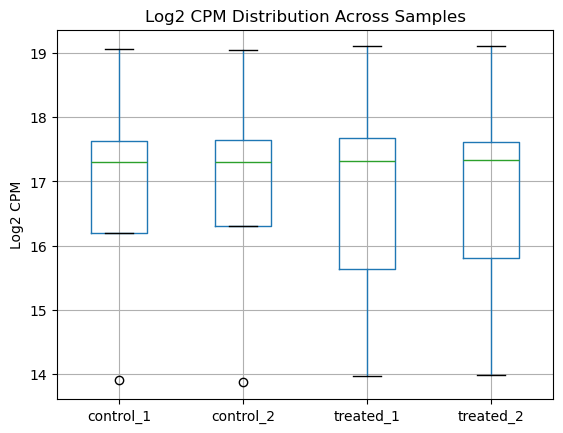

In [62]:
plt.figure()
log_cpm[sample_cols].boxplot()
plt.title("Log2 CPM Distribution Across Samples")
plt.ylabel("Log2 CPM")
plt.show()

In [63]:
# Compute mean expression per condition
log_cpm["control_mean"] = log_cpm[["control_1", "control_2"]].mean(axis=1)
log_cpm["treated_mean"] = log_cpm[["treated_1", "treated_2"]].mean(axis=1)

# Log2 fold change
log_cpm["log2_fold_change"] = log_cpm["treated_mean"] - log_cpm["control_mean"]

log_cpm[["gene_symbol", "log2_fold_change"]]

,gene_symbol,log2_fold_change
0,TP53,0.009085
1,MYC,0.051018
2,EGFR,0.019112
3,BRCA1,-0.529040
4,BCL2,0.083456


In [64]:
!pip install scipy

In [65]:
from scipy.stats import ttest_ind

p_values = []

for i, row in log_cpm.iterrows():
    control_vals = row[["control_1", "control_2"]]
    treated_vals = row[["treated_1", "treated_2"]]
    
    t_stat, p_val = ttest_ind(control_vals, treated_vals)
    p_values.append(p_val)

log_cpm["p_value"] = p_values

log_cpm[["gene_symbol", "log2_fold_change", "p_value"]]

AttributeError: 'numpy.dtypes.ObjectDType' object has no attribute 'dtype'

In [66]:
# Ensure sample columns are numeric (float)
for c in sample_cols:
    log_cpm[c] = pd.to_numeric(log_cpm[c], errors="coerce")

# Quick check
log_cpm[sample_cols].dtypes

control_1    float64
control_2    float64
treated_1    float64
treated_2    float64
dtype: object

In [67]:
from scipy.stats import ttest_ind
import numpy as np

p_values = []
t_stats = []

for _, row in log_cpm.iterrows():
    control_vals = row[["control_1", "control_2"]].to_numpy(dtype=float)
    treated_vals = row[["treated_1", "treated_2"]].to_numpy(dtype=float)

    t_stat, p_val = ttest_ind(control_vals, treated_vals, equal_var=False)  # Welch's t-test
    t_stats.append(t_stat)
    p_values.append(p_val)

log_cpm["t_stat"] = t_stats
log_cpm["p_value"] = p_values

log_cpm[["gene_symbol", "log2_fold_change", "t_stat", "p_value"]]

,gene_symbol,log2_fold_change,t_stat,p_value
0,TP53,0.009085,-0.335643,0.792393
1,MYC,0.051018,-6.127760,0.101485
2,EGFR,0.019112,-3.328643,0.185781
3,BRCA1,-0.529040,5.161003,0.053882
4,BCL2,0.083456,-4.167232,0.117030


In [69]:
!pip install statsmodels

  Using cached patsy-1.0.2-py2.py3-none-any.whl.metadata (3.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 7.7 MB/s  0:00:01eta 0:00:01
Using cached patsy-1.0.2-py2.py3-none-any.whl (233 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]


In [70]:
from statsmodels.stats.multitest import multipletests

adjusted = multipletests(log_cpm["p_value"], method="fdr_bh")
log_cpm["FDR"] = adjusted[1]

log_cpm[["gene_symbol", "log2_fold_change", "p_value", "FDR"]]

,gene_symbol,log2_fold_change,p_value,FDR
0,TP53,0.009085,0.792393,0.792393
1,MYC,0.051018,0.101485,0.195049
2,EGFR,0.019112,0.185781,0.232227
3,BRCA1,-0.529040,0.053882,0.195049
4,BCL2,0.083456,0.117030,0.195049


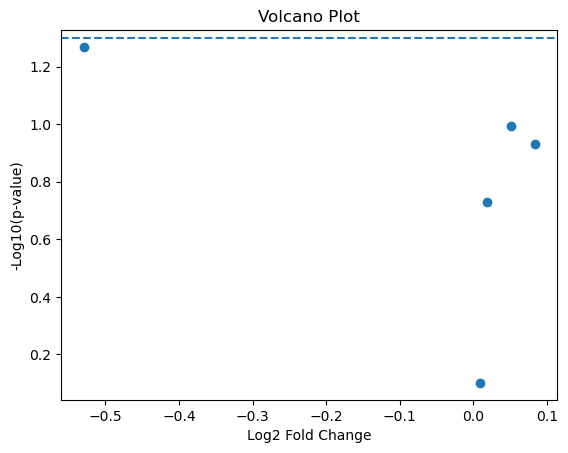

In [71]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

plt.scatter(
    log_cpm["log2_fold_change"],
    -np.log10(log_cpm["p_value"])
)

plt.xlabel("Log2 Fold Change")
plt.ylabel("-Log10(p-value)")
plt.title("Volcano Plot")
plt.axhline(-np.log10(0.05), linestyle="--")
plt.show()